# Layers To Construct CNN:

* It resizes it spatially and uses the MAX function.  
* **Fully Connected Layer or Output Layer:**  
    - This Layer computes the output scores in the last layer.  
    - The final output is of the size 1\*1\*L, where L is the number of training dataset classes.  
    
* **Input Layer:** It takes the raw image data.  
* **Convolutional Layer:** It is the core building block of CNN and it does most of the computations.  
    - It computes the convolution between the neurons and various patches in the input.  
    
* **Rectified Linear Unit Layer:** It applies an activation function to the output of previous layer.  
    - It adds non-linear features to the network so that it fits well to any type of function.  
    
* **Pooling Layer:** It helps us to keep only the important parts as we proceed through the network.  
    - This layer operates independently on every slice of input.

# CNN (Convolutional Neural Network)

* It is a feed - forward neural network.  
* It is used to analyze the visual images by processing the data with grid - like topology.  
* It is also called as **ConvNet.**  
* A CNN is used to detect and classify objects in an image.  
* Following is an example of neural network that identifies two types of flowers.  

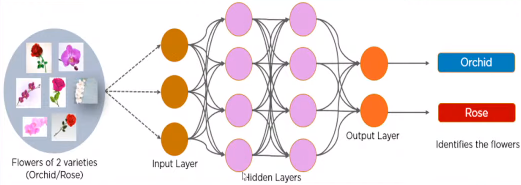

## CNN - Image Representation  

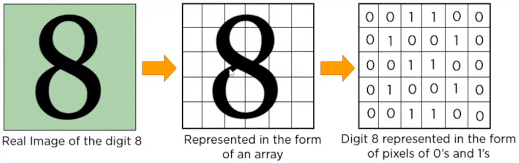  

* The convolution operation forms the basis of any convolutional neural network.  
* Conside two matrices A & B  
    - A = [5, 3, 7, 5, 9, 7]  
    - B = [1, 2, 3]  
* In the convolution operation, the arrays are multiplied element - wise and the product is summed to create a new array, A\*B.  
* The first three elements of matrix A are multiplied with matrix B.  
* The product is summed to create get the result.  

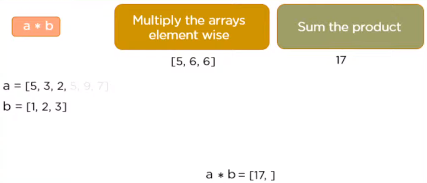  

* The next three elements from matrix A are multiplied by the elements in the matrix B.  
* The product is summed up.  

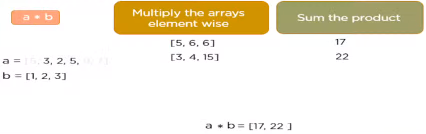  

* The process is repeated until the convolution operation is completed.

## Image Recognition - CNN  

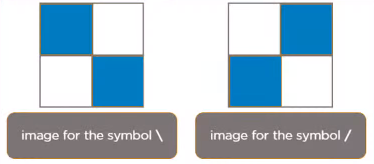  

### Example:  

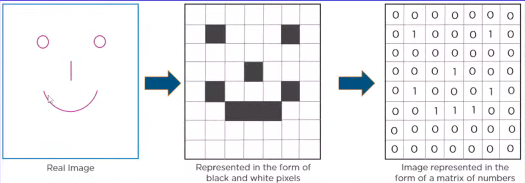

## CNN - Layers

* This step is used to extract some essential features from an Image.  
* A convolution layer has various filters that performs the convolution operation.  
* Every image is considered as a matrix of pixel values.  
* Consider the following 5\*5 image whose pixel values are either 0 or 1.  
* There's also a 3\*3 filter matrix.  
* Apply the filter matrix over the image and find the dot product to get the convolved feature matrix.  

* **ReLU:**  
    - It stands for Rectified Exponential Linear Unit.  
* Once the features are extracted, the next step is to move them to a ReLU layer.  
* This operation operates on each element and it sets all the negative pixels to zero.  
* It introduces non-linearity to the network and the generated output is a rectified feature map.  

The original image is scanned with multiple convolutions and ReLU layers for locating the features.  

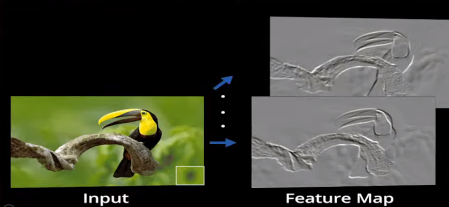  

* **Pooling Layer:**  
* It is a down - sampling operation that reduces the dimensionality of the feature map.  
* The rectified feature map goes through a pooling layer to generate a **pooled feature map.**  

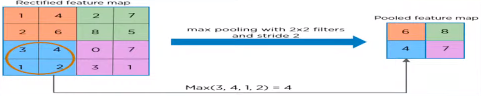  

* The pooling layer uses various filters in order to identify different parts of an image like edges, corners, body, feathers, eyes & beak.  

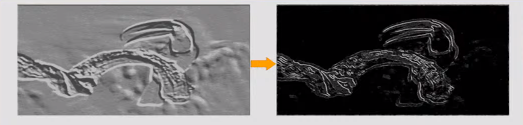  

* This is the structure of CNN:  

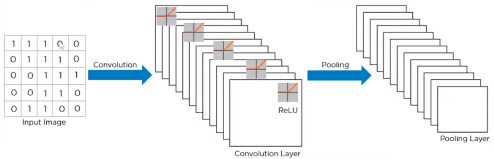  


* The next step in the process is called **flattening**  
* This process is used to convert all the resultant 2-D arrays from pooled feature maps into a single long continuous linear vector.  

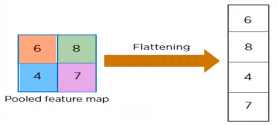   

* **The pooled feature map is flattened and fed to a fully connected layer to get the final output.**  

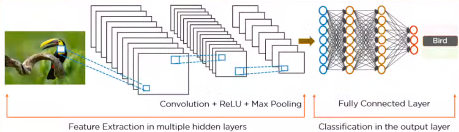  


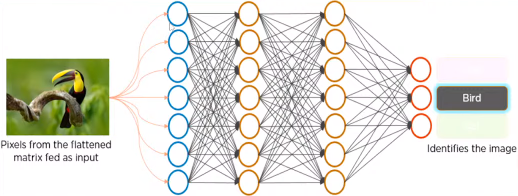

## Steps to Recognize a Bird using CNN  

* The pixels from the image are fed to the convolution layer that performs the convolution operation.  
* It results in a convoluted map.  
* The convoluted map is applied to the ReLU function to create a rectified feature map.  
* The image is processed with multiple convolutions and ReLU layers for locating the features.  
* Different pooling layers with various filters are used to identify the specific parts of the image.  

# Digits Classification - CNN

* For our classification, we are going to collect the data from MNIST database.  
* It is nothing but a database of handwritten images.  
* MNIST is a collection of 60,000 28\*28 grayscale images.  
* It contains 10 digits.  
* It also contains 10,000 test images.  
* The first step in any classification is that we need to design the model.  

## Model Representation using CNN  

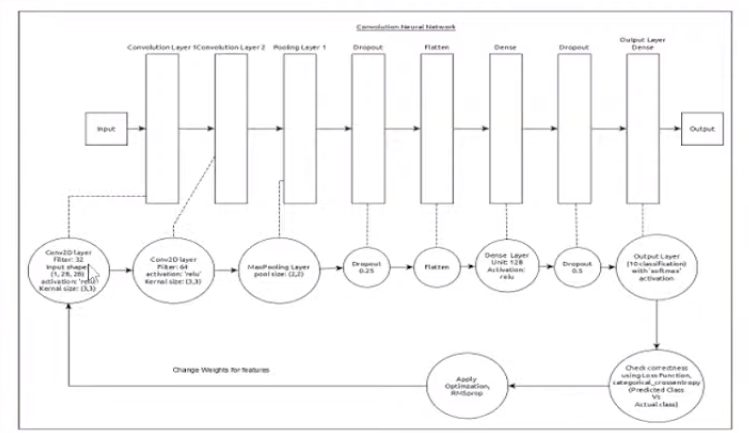

## Step 1: Import Required Modules

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import tensorflow as tf

## Step 2: Load the Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape,"x_test shape:", X_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


## Step 3: Process the Data

In [3]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

## Step 4: Create The Model

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## Step 5: Compile The Model

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
             metrics=['accuracy'])

## Step 6: Train The Model

In [7]:
model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 91s 193ms/step - loss: 0.2554 - accuracy: 0.9221 - val_loss: 0.0563 - val_accuracy: 0.9807
Epoch 2/12
469/469 [==============================] - 90s 193ms/step - loss: 0.0908 - accuracy: 0.9731 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 3/12
469/469 [==============================] - 91s 193ms/step - loss: 0.0691 - accuracy: 0.9797 - val_loss: 0.0391 - val_accuracy: 0.9870
Epoch 4/12
469/469 [==============================] - 90s 193ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0323 - val_accuracy: 0.9891
Epoch 5/12
469/469 [==============================] - 90s 192ms/step - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.0292 - val_accuracy: 0.9913
Epoch 6/12
469/469 [==============================] - 97s 207ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 7/12
469/469 [==============================] - 92s 196ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0323 - val_ac

## Evaluate The Model

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Test loss: 0.034857142716646194
Test Accuracy: 0.9900000095367432
